# Rutik Ambre - IPL Analysis ( MI VS KXIP)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [3]:
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [28]:
teams1=matches[(matches['team1']=='Mumbai Indians') & (matches['team2']=='Kings XI Punjab')]    #EDA and cleaning
teams2=matches[(matches['team1']=='Kings XI Punjab') & (matches['team2']=='Mumbai Indians')]
teamsf=pd.concat([teams1,teams2])
teamsf=teamsf.sort_values(by=['season'])
teamsf

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
68,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN
156,157,2009,Centurion,2009-05-12,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,8,Harbhajan Singh,SuperSport Park,SS Hazare,RE Koertzen,NaN
134,135,2009,Durban,2009-04-29,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead,MR Benson,SL Shastri,NaN
200,201,2010,Mumbai,2010-03-30,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,SL Malinga,Brabourne Stadium,BR Doctrove,SK Tarapore,NaN
214,215,2010,Chandigarh,2010-04-09,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN
286,287,2011,Chandigarh,2011-05-10,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,76,0,BA Bhatt,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker,NaN
272,273,2011,Mumbai,2011-05-02,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,23,0,KA Pollard,Wankhede Stadium,HDPK Dharmasena,PR Reiffel,NaN
335,336,2012,Mumbai,2012-04-22,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,SE Marsh,Wankhede Stadium,S Ravi,RJ Tucker,NaN
339,340,2012,Chandigarh,2012-04-25,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,4,AT Rayudu,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,BNJ Oxenford,NaN


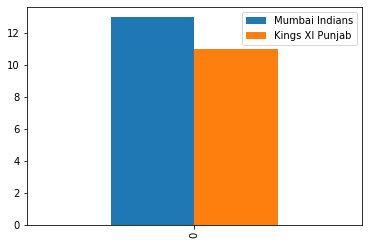

In [16]:
winner=pd.get_dummies(teamsf['winner'])
winner=winner.reset_index(drop=True)   #converting the text data to numeric to see who has won more
data = [[len(winner[winner['Mumbai Indians']==1]), len(winner[winner['Kings XI Punjab']==1])]] 
df = pd.DataFrame(data, columns = ['Mumbai Indians', 'Kings XI Punjab'])
df.plot(kind='bar')

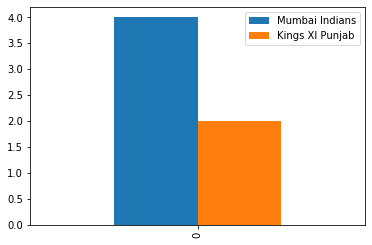

In [22]:
wlst3=teamsf[teamsf['season']>=2017]
winner=pd.get_dummies(wlst3['winner'])
winner=winner.reset_index(drop=True)   
data = [[len(winner[winner['Mumbai Indians']==1]), len(winner[winner1['Kings XI Punjab']==1])]] 
df = pd.DataFrame(data, columns = ['Mumbai Indians', 'Kings XI Punjab'])
df.plot(kind='bar')

The overall stats and even the stats for the last 3 years state that Mumbai is Dominant over KXIP

In [96]:
kl_stats = deliveries[deliveries['batsman']== 'KL Rahul']
kl_stats = kl_stats[['match_id','inning','batting_team','bowling_team','batsman_runs',
                           'player_dismissed','dismissal_kind']]
kl_stats.head()

,match_id,inning,batting_team,bowling_team,batsman_runs,player_dismissed,dismissal_kind
94952,401,2,Royal Challengers Bangalore,Delhi Daredevils,0,NaN,NaN
94953,401,2,Royal Challengers Bangalore,Delhi Daredevils,0,NaN,NaN
94954,401,2,Royal Challengers Bangalore,Delhi Daredevils,0,NaN,NaN
94955,401,2,Royal Challengers Bangalore,Delhi Daredevils,0,NaN,NaN
94956,401,2,Royal Challengers Bangalore,Delhi Daredevils,1,NaN,NaN


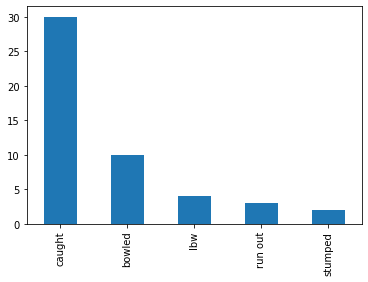

In [97]:
kl_stats['dismissal_kind'].value_counts().plot(kind='bar')

As we can see the out percentage of kl rahul is heavily skewed to getting out caught, he has trouble
when ball falls a bit short then expected and he gets out by a top edge most of the times. 

In [98]:
powerplay=deliveries[(deliveries['batting_team']=='Kings XI Punjab') & (deliveries['over']<7)]
powerplay

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
838,4,2,Kings XI Punjab,Rising Pune Supergiant,1,1,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
839,4,2,Kings XI Punjab,Rising Pune Supergiant,1,2,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
840,4,2,Kings XI Punjab,Rising Pune Supergiant,1,3,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
841,4,2,Kings XI Punjab,Rising Pune Supergiant,1,4,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
842,4,2,Kings XI Punjab,Rising Pune Supergiant,1,5,M Vohra,HM Amla,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177793,11346,2,Kings XI Punjab,Chennai Super Kings,6,4,KL Rahul,CH Gayle,DJ Bravo,0,...,0,4,0,0,4,4,8,NaN,NaN,NaN
177794,11346,2,Kings XI Punjab,Chennai Super Kings,6,5,KL Rahul,CH Gayle,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177795,11346,2,Kings XI Punjab,Chennai Super Kings,6,6,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177796,11346,2,Kings XI Punjab,Chennai Super Kings,6,7,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN


In [99]:
powerplay_stats = powerplay.groupby(by=["match_id"], as_index=False).agg({'inning': 'first', 'batting_team': 'first', 'bowling_team': 'first', 
                                                                          'total_runs': 'sum','player_dismissed':'count'})
powerplay_stats.head()

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed
0,4,2,Kings XI Punjab,Rising Pune Supergiant,56,2
1,8,2,Kings XI Punjab,Royal Challengers Bangalore,62,1
2,11,1,Kings XI Punjab,Kolkata Knight Riders,57,1
3,15,2,Kings XI Punjab,Delhi Daredevils,40,3
4,19,2,Kings XI Punjab,Sunrisers Hyderabad,51,2


In [100]:
match_season= matches[['id', 'season']]
match_season.head()

,id,season
0,1,2017
1,2,2017
2,3,2017
3,4,2017
4,5,2017


In [101]:
powerplay_match=powerplay_stats.merge(match_season,left_on='match_id', right_on='id')
powerplay_match.head()

powerplay_mi = powerplay_match[powerplay_match['bowling_team']=='Mumbai Indians']
powerplay_mi.head()

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,id,season
5,22,1,Kings XI Punjab,Mumbai Indians,46,1,22,2017
12,50,1,Kings XI Punjab,Mumbai Indians,71,1,50,2017
16,69,1,Kings XI Punjab,Mumbai Indians,60,1,69,2008
25,106,1,Kings XI Punjab,Mumbai Indians,43,1,106,2008
33,135,1,Kings XI Punjab,Mumbai Indians,26,2,135,2009


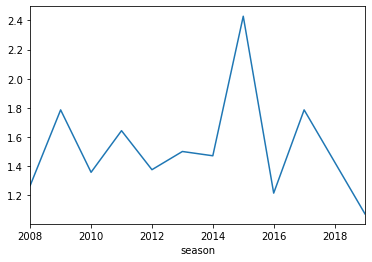

In [102]:
powerplay_match.groupby(['season'])['player_dismissed'].mean().plot()


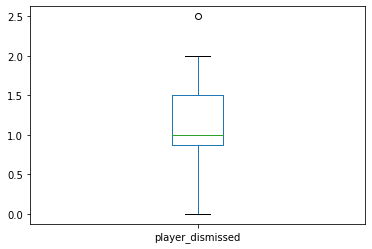

In [103]:
powerplay_mi.groupby(['season'])['player_dismissed'].mean().plot(kind='box')

The line graph shows the KXIP performance in powerplay, and the box plot is the KXIP performance in powerplay against MI,
there is hardly any season where KXIP have lost 3 or more wickets in powerplay

The line graph tells us that KXIP average wickets in powerplay are close to 1.4 , but in case of Mumbai Indians it is close to 1,
so 1 wicket will fall in powerplay

In [157]:
qd_stats = deliveries[deliveries['batsman']== 'Q de Kock']
qd_stats = qd_stats[['match_id','inning','batting_team','bowling_team','batsman_runs',
                           'player_dismissed','dismissal_kind','bowler']]
qd_stats

,match_id,inning,batting_team,bowling_team,batsman_runs,player_dismissed,dismissal_kind,bowler
95087,402,1,Sunrisers Hyderabad,Pune Warriors,0,NaN,NaN,B Kumar
95088,402,1,Sunrisers Hyderabad,Pune Warriors,0,NaN,NaN,B Kumar
95089,402,1,Sunrisers Hyderabad,Pune Warriors,1,NaN,NaN,B Kumar
95091,402,1,Sunrisers Hyderabad,Pune Warriors,0,NaN,NaN,AB Dinda
95092,402,1,Sunrisers Hyderabad,Pune Warriors,0,NaN,NaN,AB Dinda
...,...,...,...,...,...,...,...,...
178851,11415,1,Mumbai Indians,Chennai Super Kings,1,NaN,NaN,Harbhajan Singh
178855,11415,1,Mumbai Indians,Chennai Super Kings,1,NaN,NaN,SN Thakur
178857,11415,1,Mumbai Indians,Chennai Super Kings,0,NaN,NaN,SN Thakur
178858,11415,1,Mumbai Indians,Chennai Super Kings,6,NaN,NaN,SN Thakur


In [158]:
dismissal_type=qd_stats[qd_stats['player_dismissed']=='Q de Kock']
dismissal_type['bowler'].unique()

array(['AB Dinda', 'P Kumar', 'MM Sharma', 'KV Sharma', 'CJ Anderson',
       'PV Tambe', 'UT Yadav', 'DW Steyn', 'MA Starc', 'IC Pandey',
       'YS Chahal', 'AD Russell', 'SR Watson', 'MJ McClenaghan',
       'DS Kulkarni', 'S Kaushik', 'MP Stoinis', 'MC Henriques',
       'KH Pandya', 'BB Sran', 'PP Chawla', 'R Ashwin', 'D Short',
       'DJ Bravo', 'Kuldeep Yadav', 'I Sharma', 'Mohammed Shami',
       'DL Chahar', 'S Kaul', 'J Archer', 'M Ali', 'S Gopal', 'SP Narine',
       'P Krishna', 'Harbhajan Singh', 'SN Thakur'], dtype=object)

In [159]:
dismissal_type.head()

,match_id,inning,batting_team,bowling_team,batsman_runs,player_dismissed,dismissal_kind,bowler
95097,402,1,Sunrisers Hyderabad,Pune Warriors,0,Q de Kock,caught,AB Dinda
95924,405,2,Sunrisers Hyderabad,Kings XI Punjab,0,Q de Kock,bowled,P Kumar
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,0,Q de Kock,caught,MM Sharma
111245,469,2,Delhi Daredevils,Sunrisers Hyderabad,0,Q de Kock,caught,KV Sharma
112109,473,2,Delhi Daredevils,Mumbai Indians,0,Q de Kock,caught,CJ Anderson


In [160]:
dismissal_type.replace(['AB Dinda', 'P Kumar', 'MM Sharma', 'CJ Anderson', 'UT Yadav', 'DW Steyn', 
                                  'MA Starc', 'IC Pandey', 'AD Russell', 'SR Watson', 'MJ McClenaghan',
       'DS Kulkarni', 'MP Stoinis', 'MC Henriques', 'BB Sran',  'DJ Bravo', 'I Sharma', 'Mohammed Shami',
       'DL Chahar', 'S Kaul', 'J Archer', 'P Krishna', 'SN Thakur'],1,inplace=True)
dismissal_type.replace(['Harbhajan Singh','SP Narine','S Gopal','M Ali','R Ashwin','YS Chahal','Kuldeep Yadav','D Short',
                       'PP Chawla','KH Pandya','S Kaushik','KV Sharma','PV Tambe'],2,inplace=True)
dismissal_type.head()


,match_id,inning,batting_team,bowling_team,batsman_runs,player_dismissed,dismissal_kind,bowler
95097,402,1,Sunrisers Hyderabad,Pune Warriors,0,Q de Kock,caught,1
95924,405,2,Sunrisers Hyderabad,Kings XI Punjab,0,Q de Kock,bowled,1
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,0,Q de Kock,caught,1
111245,469,2,Delhi Daredevils,Sunrisers Hyderabad,0,Q de Kock,caught,2
112109,473,2,Delhi Daredevils,Mumbai Indians,0,Q de Kock,caught,1


Replaced the fast bowlers by 1 , and spin bowlers by 2

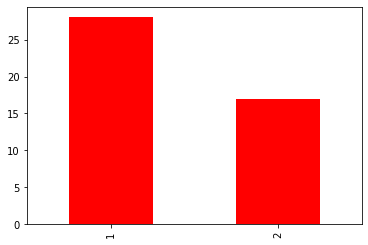

In [161]:
dismissal_type['bowler'].value_counts().plot(kind='bar',color='red')

overall record of quinton against pacers vs spinners is getting out more against pacers,
In the plot 1 is pacers and 2 are spinners

In [164]:
dismissal_type=dismissal_type.merge(match_season,left_on='match_id', right_on='id')
dismissal_type.head()

,match_id,inning,batting_team,bowling_team,batsman_runs,player_dismissed,dismissal_kind,bowler,id,season
0,402,1,Sunrisers Hyderabad,Pune Warriors,0,Q de Kock,caught,1,402,2013
1,405,2,Sunrisers Hyderabad,Kings XI Punjab,0,Q de Kock,bowled,1,405,2013
2,414,1,Sunrisers Hyderabad,Chennai Super Kings,0,Q de Kock,caught,1,414,2013
3,469,2,Delhi Daredevils,Sunrisers Hyderabad,0,Q de Kock,caught,2,469,2014
4,473,2,Delhi Daredevils,Mumbai Indians,0,Q de Kock,caught,1,473,2014


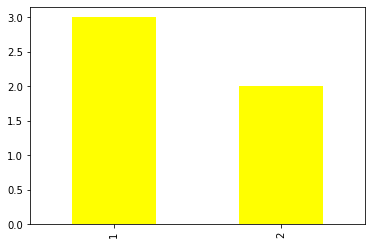

In [165]:
dismissal_type= dismissal_type[dismissal_type['bowling_team']=='Kings XI Punjab']
dismissal_type['bowler'].value_counts().plot(kind='bar',color='yellow')

The overall record of Quinton is getting more times out on pacers, but he has played 3 matches against Punjab out of which in
2 matches he is been dismissed by a spinner, but 3 matches are not sufficient to predict so we go with pacer dismissed.

In [173]:
teams11=deliveries[(deliveries['batting_team']=='Mumbai Indians') & (deliveries['bowling_team']=='Kings XI Punjab')]    
teams22=deliveries[(deliveries['batting_team']=='Kings XI Punjab') & (deliveries['bowling_team']=='Mumbai Indians')]
teamsff=pd.concat([teams11,teams22])
teamsff=teamsff.sort_values(by=['match_id'])
teamsff.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5182,22,2,Mumbai Indians,Kings XI Punjab,1,1,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5089,22,1,Kings XI Punjab,Mumbai Indians,6,5,SE Marsh,HM Amla,MJ McClenaghan,0,...,0,0,0,0,0,0,0,SE Marsh,caught,KA Pollard
5090,22,1,Kings XI Punjab,Mumbai Indians,6,6,WP Saha,HM Amla,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5091,22,1,Kings XI Punjab,Mumbai Indians,7,1,HM Amla,WP Saha,KH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5092,22,1,Kings XI Punjab,Mumbai Indians,7,2,HM Amla,WP Saha,KH Pandya,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [174]:
teamsff['player_dismissed'] = teamsff['player_dismissed'].apply(lambda x: 1 if not pd.isnull(x) else 0)
teamsff.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5182,22,2,Mumbai Indians,Kings XI Punjab,1,1,PA Patel,JC Buttler,Sandeep Sharma,0,...,0,0,0,0,1,0,1,0,NaN,NaN
5089,22,1,Kings XI Punjab,Mumbai Indians,6,5,SE Marsh,HM Amla,MJ McClenaghan,0,...,0,0,0,0,0,0,0,1,caught,KA Pollard
5090,22,1,Kings XI Punjab,Mumbai Indians,6,6,WP Saha,HM Amla,MJ McClenaghan,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5091,22,1,Kings XI Punjab,Mumbai Indians,7,1,HM Amla,WP Saha,KH Pandya,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5092,22,1,Kings XI Punjab,Mumbai Indians,7,2,HM Amla,WP Saha,KH Pandya,0,...,0,0,0,0,2,0,2,0,NaN,NaN


In [176]:
wickets = teamsff.groupby(by=["match_id"], as_index=False).agg({'batting_team': 'first', 'bowling_team': 'first', 
                                                                          'total_runs': 'sum','player_dismissed':'sum'})
wickets.head()

,match_id,batting_team,bowling_team,total_runs,player_dismissed
0,22,Mumbai Indians,Kings XI Punjab,397,6
1,50,Mumbai Indians,Kings XI Punjab,453,9
2,69,Kings XI Punjab,Mumbai Indians,298,19
3,106,Mumbai Indians,Kings XI Punjab,377,14
4,135,Mumbai Indians,Kings XI Punjab,235,15


In [178]:

wickets_match=wickets.merge(match_season,left_on='match_id', right_on='id')
wickets_match.head()

,match_id,batting_team,bowling_team,total_runs,player_dismissed,id,season
0,22,Mumbai Indians,Kings XI Punjab,397,6,22,2017
1,50,Mumbai Indians,Kings XI Punjab,453,9,50,2017
2,69,Kings XI Punjab,Mumbai Indians,298,19,69,2008
3,106,Mumbai Indians,Kings XI Punjab,377,14,106,2008
4,135,Mumbai Indians,Kings XI Punjab,235,15,135,2009


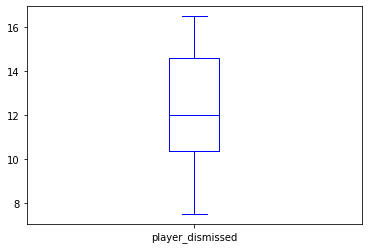

In [184]:
wickets_match.groupby(['season'])['player_dismissed'].mean().plot(kind='box',color='blue')

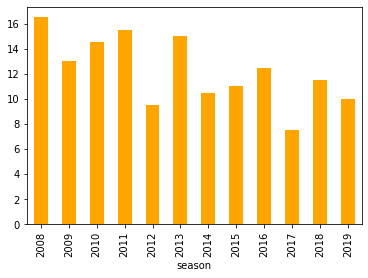

In [183]:
wickets_match.groupby(['season'])['player_dismissed'].mean().plot(kind='bar',color='orange')

The trend shows that not more than 12 wickets have fallen since 2014 between mumbai and punjab 
Also there is only 1 instance where more than 16 wickets have fallen so that is an outlier
And the wickets between 0-5 are none so that is even not possible
the box plot shows the mean wickets are 12 which is between 11-15 category is a logical conclusion for answer